In [67]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# lakukan impor data dari .csv hasil scrapping yang sudah disimpan di google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilscrapping.csv")

# tampilkan data apakah file csv berhasil dimuat
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1861560495368741261,Tue Nov 26 23:59:42 +0000 2024,0,Untuk @KominfoJatim mudah mudahan darah baru e...,1861560495368741261,NaN,NaN,in,NaN,0,0,0,https://x.com/HimawanIma85713/status/186156049...,1779573150562627584,HimawanIma85713
1,1861266131153232384,Tue Nov 26 23:56:23 +0000 2024,0,@TeddGus @prabowo @ridwankamil anak fufufafa,1861559660266049595,NaN,TeddGus,in,NaN,0,0,0,https://x.com/KomendrNetizen/status/1861559660...,1152492672,KomendrNetizen
2,1860942154086191530,Tue Nov 26 23:52:49 +0000 2024,0,@jansen_jsp @ridwankamil Top lah ... Jangan ra...,1861558762911473701,NaN,jansen_jsp,in,NaN,0,0,0,https://x.com/IwanbaruSyah/status/186155876291...,1760051819148185600,IwanbaruSyah
3,1861557498131485159,Tue Nov 26 23:47:48 +0000 2024,0,Kalau nyarik kerja di daerahnya masing masing ...,1861557498131485159,NaN,NaN,in,NaN,0,0,0,https://x.com/Firzafrnanda/status/186155749813...,161837801,Firzafrnanda
4,1861266131153232384,Tue Nov 26 23:45:56 +0000 2024,0,@TeddGus @prabowo @ridwankamil ANJING tetaplah...,1861557030085108107,NaN,TeddGus,in,"Jakarta, Bandung..Indonesia",0,0,0,https://x.com/Mully_Yana/status/18615570300851...,101642311,Mully_Yana


In [69]:
# update isi dengan menyeleksi field yang dibutuhkan saja
df = df[['full_text', 'username', 'created_at']]

# tampilkan dengan field atau kolom yang sudah diperbarui
df.head()

,full_text,username,created_at
0,Untuk @KominfoJatim mudah mudahan darah baru e...,HimawanIma85713,Tue Nov 26 23:59:42 +0000 2024
1,@TeddGus @prabowo @ridwankamil anak fufufafa,KomendrNetizen,Tue Nov 26 23:56:23 +0000 2024
2,@jansen_jsp @ridwankamil Top lah ... Jangan ra...,IwanbaruSyah,Tue Nov 26 23:52:49 +0000 2024
3,Kalau nyarik kerja di daerahnya masing masing ...,Firzafrnanda,Tue Nov 26 23:47:48 +0000 2024
4,@TeddGus @prabowo @ridwankamil ANJING tetaplah...,Mully_Yana,Tue Nov 26 23:45:56 +0000 2024


# 1. Cleaning Data

In [70]:
# cek berapa kolom dan baris sebelum data dibersihkan
df.shape

(512, 3)

In [71]:
# hapus record dari field yang memiliki nilai yang sama atau duplikat, field dari full_text
df = df.drop_duplicates(subset='full_text')

# cek apakah masih ada data duplikat
df.duplicated().sum()

0

In [72]:
# hapus record dengan nilai yang kosong
df = df.dropna()

# cek apakah masih ada data yang kosong
df.isnull().sum()

,0
full_text,0
username,0
created_at,0


In [73]:
# cek apakah ada data yang dihapus atau dibersihkan
df.shape

(508, 3)

In [74]:
# function untuk melakukan pembersihan text
def clean_twitter_text(text):
    # menghapus mentions (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # menghapus hashtag (#hashtag)
    text = re.sub(r'#\w+', '', text)
    # menghapus "RT" (retweet)
    text = re.sub(r'RT[\s]+', '', text)
    # menghapus link (http, https)
    text = re.sub(r'https?://\S+', '', text)
    # menghapus karakter non-alfanumerik kecuali spasi
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    # menghapus spasi berlebih dan merapikan teks
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# masukkan data yang kita punya ke function tersebut
df['full_text'] = df['full_text'].apply(clean_twitter_text)

# tampilkan data yang sudah dibersihkan
df.head()

,full_text,username,created_at
0,Untuk mudah mudahan darah baru energik yang me...,HimawanIma85713,Tue Nov 26 23:59:42 +0000 2024
1,anak fufufafa,KomendrNetizen,Tue Nov 26 23:56:23 +0000 2024
2,Top lah Jangan ragukan komitmen PKS Indonesia ...,IwanbaruSyah,Tue Nov 26 23:52:49 +0000 2024
3,Kalau nyarik kerja di daerahnya masing masing ...,Firzafrnanda,Tue Nov 26 23:47:48 +0000 2024
4,ANJING tetaplah ANJING apapun wujud Dan statusnya,Mully_Yana,Tue Nov 26 23:45:56 +0000 2024


In [75]:
# ubah teks menjadi huruf kecil
df['full_text'] = df['full_text'].str.lower()

# tampilkan data yang sudah diubah menjadi huruf kecil
df.head()

,full_text,username,created_at
0,untuk mudah mudahan darah baru energik yang me...,HimawanIma85713,Tue Nov 26 23:59:42 +0000 2024
1,anak fufufafa,KomendrNetizen,Tue Nov 26 23:56:23 +0000 2024
2,top lah jangan ragukan komitmen pks indonesia ...,IwanbaruSyah,Tue Nov 26 23:52:49 +0000 2024
3,kalau nyarik kerja di daerahnya masing masing ...,Firzafrnanda,Tue Nov 26 23:47:48 +0000 2024
4,anjing tetaplah anjing apapun wujud dan statusnya,Mully_Yana,Tue Nov 26 23:45:56 +0000 2024


2. Preprocessing
  *   Normalisasi
  *   Stopword
  *   Tokenize
  *   Stemming





In [76]:
# NORMALISASI
norm = {
    " yg ": " yang ",
    " pramono anung ": " ",
    " pram ": " ",
    " nggak ": " tidak ",
    " gk ": " tidak ",
    " ga ": " tidak ",
    " aja ": " saja ",
    " doang ": " saja ",
    " kok ": "",
    " kalo ": " kalau ",
    " klo ": " kalau ",
    " kamu ": " Anda ",
    " saya ": " aku ",
    " ama ": " sama ",
    " dgn ": " dengan ",
    " dlm ": " dalam ",
    " di ": " di ",
    " sma ": " sama ",
    " trs ": " terus ",
    " tp ": " tapi ",
    " tdk ": " tidak ",
    " jd ": " jadi ",
    " sy ": " saya ",
    " dpt ": " dapat ",
    " gitu ": " begitu ",
    " lbh ": " lebih ",
    " pd ": " pada ",
    " utk ": " untuk ",
    " bgt ": " banget ",
    " tsb ": " tersebut ",
    " dr ": " dari ",
    " spt ": " seperti ",
    " krn ": " karena ",
    " mrk ": " mereka ",
    " yng ": " yang ",
    " lo " : " kamu "
}

# buat function untuk penerapan normalisasi
def normalisasi(str_text):
    # loop melalui kamus norm
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

# menerapkan normalisasi ke kolom 'full_text' di dataframe
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))

# tampilkan
df

,full_text,username,created_at
0,untuk mudah mudahan darah baru energik yang me...,HimawanIma85713,Tue Nov 26 23:59:42 +0000 2024
1,anak fufufafa,KomendrNetizen,Tue Nov 26 23:56:23 +0000 2024
2,top lah jangan ragukan komitmen pks indonesia ...,IwanbaruSyah,Tue Nov 26 23:52:49 +0000 2024
3,kalau nyarik kerja di daerahnya masing masing ...,Firzafrnanda,Tue Nov 26 23:47:48 +0000 2024
4,anjing tetaplah anjing apapun wujud dan statusnya,Mully_Yana,Tue Nov 26 23:45:56 +0000 2024
...,...,...,...
507,toh di situ di sebutkan bahwa aku prabowo subi...,akiyama1403,Tue Nov 26 14:30:02 +0000 2024
508,beliau ketum gerindra gerindra yang ngusung ri...,akiyama1403,Tue Nov 26 14:29:07 +0000 2024
509,situ pernah main ke bandung,vwexcellent,Tue Nov 26 14:26:31 +0000 2024
510,ada yang panik rupanya,SiahaanPardo,Tue Nov 26 14:26:24 +0000 2024


In [77]:
!pip install Sastrawi

In [78]:
# STOPWORDS
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# dapatkan stop words bawaan dari Sastrawi
stop_words = StopWordRemoverFactory().get_stop_words()


# buat ArrayDictionary dengan stop words baru
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

# fungsi untuk menghapus stop word dari teks
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# menerapkan fungsi stopword ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))

# tampilkan beberapa baris pertama untuk verifikasi
df.head()


,full_text,username,created_at
0,mudah mudahan darah baru energik menang mudah ...,HimawanIma85713,Tue Nov 26 23:59:42 +0000 2024
1,anak fufufafa,KomendrNetizen,Tue Nov 26 23:56:23 +0000 2024
2,top lah jangan ragukan komitmen pks indonesia ...,IwanbaruSyah,Tue Nov 26 23:52:49 +0000 2024
3,kalau nyarik kerja daerahnya masing masing jan...,Firzafrnanda,Tue Nov 26 23:47:48 +0000 2024
4,anjing tetaplah anjing apapun wujud statusnya,Mully_Yana,Tue Nov 26 23:45:56 +0000 2024


In [79]:
# TOKENIZE (teks yang sebelumnya kalimat dipisahkan menjadi tiap-tiap kata)
tokenized = df['full_text'].apply (lambda x:x.split())
tokenized

,full_text
0,"[mudah, mudahan, darah, baru, energik, menang,..."
1,"[anak, fufufafa]"
2,"[top, lah, jangan, ragukan, komitmen, pks, ind..."
3,"[kalau, nyarik, kerja, daerahnya, masing, masi..."
4,"[anjing, tetaplah, anjing, apapun, wujud, stat..."
...,...
507,"[situ, di, sebutkan, aku, prabowo, subianto, s..."
508,"[beliau, ketum, gerindra, gerindra, ngusung, r..."
509,"[situ, pernah, main, bandung]"
510,"[yang, panik, rupanya]"


In [80]:
# STEMMING (untuk merubah kata yang memiliki imbuhan menjadi kata dasar, cth: dimakan menjadi makan)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# fungsi untuk stemming
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean


# terapkan fungsi tersebut
tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilPreprocessing.csv", index=False)
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilPreprocessing.csv", encoding='latin1')


mudah mudah darah baru energik menang mudah mudah andika menang mudah mudah menang mudah mudah menang
anak fufufafa
top lah jangan ragu komitmen pks indonesia banget dah
kalau nyarik kerja daerah masing masing jangan lompat provinsi
anjing tetap anjing apa wujud status
pak kalau mau guna hak pilih baik waktu akhir coblos karena pasti blowup media di framing ut jadi berita pengaruh pilih di jakarta
fitnah sekarangbila ng minoritas kuno itu sama
sengaak loe
ada skenario
percuma lae biar pilih major minor pake naluri nalar feeling masing mungkin lae betul apa jujur semua penting kasih saran orang parpol pulak
ngga ada sudi pilih partai urus jilat pantat tedd jadi boneka keset sdh takdir kok
waktu tulis surat himbauan dp gerindra khan kawal pempres jadi ngga apa2 khan hari libur bagai oknum khan jadi ngga apa2lah saat2 tindak sbg anggora solo si mul ngga yang salah singa asia jadi puss meong kok
masalah wat lo
yg gak bakal milih rido
males pilih paslon dukung jkw
apasih gajelas banget
mah 

# 3. Translate to English

In [15]:
!pip install translate

In [16]:
# cek apakah data hasil preprocessing berhasil didapat
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilPreprocessing.csv", encoding='latin1')
data.head()

,full_text
0,mudah mudah darah baru energik menang mudah mu...
1,anak fufufafa
2,top lah jangan ragu komitmen pks indonesia ban...
3,kalau nyarik kerja daerah masing masing jangan...
4,anjing tetap anjing apa wujud status


In [17]:
# terjemahkan ke inggris
from translate import Translator

# buat fungsi untuk mengconvert ke bahasa inggris
def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

# terapkan fungsi tersebut
data['tweet_english'] = data['full_text'].apply(convert_eng)

# backup ke Gdrive
data.to_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilTerjemahan.csv")

# 4. Labeling

In [81]:
# ambil file hasil terjemahan di google drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ridwankamil_hasilTerjemahan.csv", index_col=0)

# karena yang diterjemahkan dilimit hanya hingga baris 200 maka diupdate hanya sampai baris tersebut
data = data.iloc[:201]

# tampilkan data
data

,full_text,tweet_english
0,mudah mudah darah baru energik menang mudah mu...,easy easy new blood energetic win easy easy an...
1,anak fufufafa,son of fufufafa
2,top lah jangan ragu komitmen pks indonesia ban...,"top, don't hesitate, the commitment of Indones..."
3,kalau nyarik kerja daerah masing masing jangan...,"if you work in your respective area, don't jum..."
4,anjing tetap anjing apa wujud status,dog fixed dog what is the status
...,...,...
196,haru prabowo guna surat pakai partai gerinda b...,haru prabowo to use the grinding party letter ...
197,program rk realistis banget sesuai butuh masya...,very realistic rk program according to the nee...
198,jakarta sekarang simpang mau maju pilih pimpin...,jakarta is now at a crossroads to move forward...
199,ulama udah sepakat tokoh masyarakat ikut dukun...,ulama has agreed that community leaders will s...


In [23]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [24]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [82]:
# proses labelling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 75
Netral = 90
Negatif = 36

Total Data : 201


In [83]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,mudah mudah darah baru energik menang mudah mu...,easy easy new blood energetic win easy easy an...,Positif
1,anak fufufafa,son of fufufafa,Netral
2,top lah jangan ragu komitmen pks indonesia ban...,"top, don't hesitate, the commitment of Indones...",Positif
3,kalau nyarik kerja daerah masing masing jangan...,"if you work in your respective area, don't jum...",Netral
4,anjing tetap anjing apa wujud status,dog fixed dog what is the status,Positif
...,...,...,...
196,haru prabowo guna surat pakai partai gerinda b...,haru prabowo to use the grinding party letter ...,Positif
197,program rk realistis banget sesuai butuh masya...,very realistic rk program according to the nee...,Positif
198,jakarta sekarang simpang mau maju pilih pimpin...,jakarta is now at a crossroads to move forward...,Positif
199,ulama udah sepakat tokoh masyarakat ikut dukun...,ulama has agreed that community leaders will s...,Netral


# 5. Visualisasi

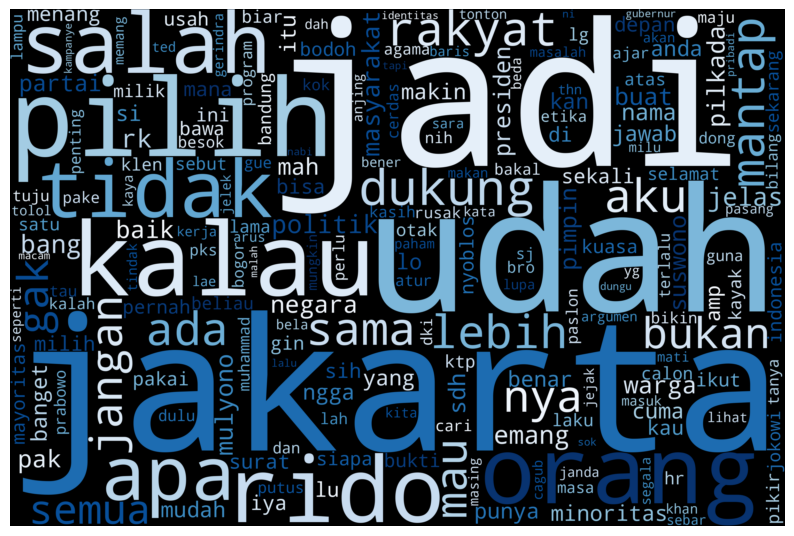

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Fungsi untuk menampilkan WordCloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menggabungkan semua tweet menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Membuat WordCloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Menampilkan WordCloud
plot_cloud(wordcloud)


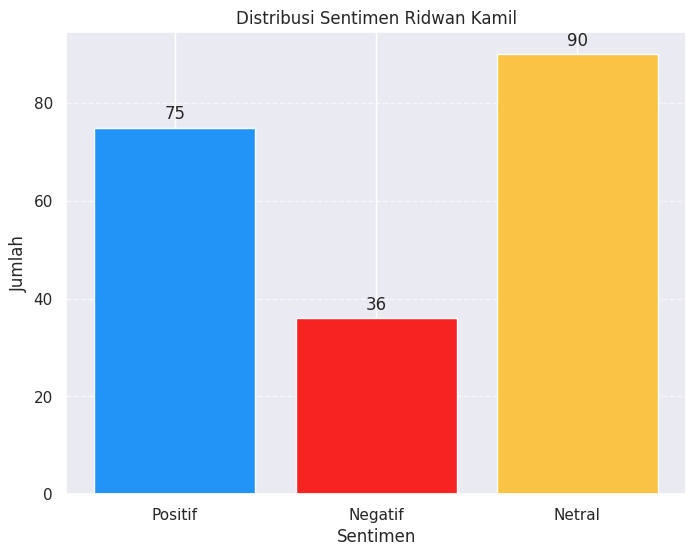

In [85]:
# visualisasi unutk menampilkan jumlah sentimen
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema seaborn
sns.set_theme()

# Label dan jumlah sentimen
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan bar chart
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan anotasi jumlah di atas bar
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Mengatur label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menampilkan bar chart dengan judul
show_bar_chart(labels, counts, "Distribusi Sentimen Ridwan Kamil")


# 6. Klasifikasi Sentimen NaiveBayes

In [93]:
data

,full_text,tweet_english,klasifikasi
0,mudah mudah darah baru energik menang mudah mu...,easy easy new blood energetic win easy easy an...,Positif
1,anak fufufafa,son of fufufafa,Netral
2,top lah jangan ragu komitmen pks indonesia ban...,"top, don't hesitate, the commitment of Indones...",Positif
3,kalau nyarik kerja daerah masing masing jangan...,"if you work in your respective area, don't jum...",Netral
4,anjing tetap anjing apa wujud status,dog fixed dog what is the status,Positif
...,...,...,...
196,haru prabowo guna surat pakai partai gerinda b...,haru prabowo to use the grinding party letter ...,Positif
197,program rk realistis banget sesuai butuh masya...,very realistic rk program according to the nee...,Positif
198,jakarta sekarang simpang mau maju pilih pimpin...,jakarta is now at a crossroads to move forward...,Positif
199,ulama udah sepakat tokoh masyarakat ikut dukun...,ulama has agreed that community leaders will s...,Netral


In [94]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [95]:
dataset

[('easy easy new blood energetic win easy easy andika win easy easy win easy easy win',
  'Positif'),
 ('son of fufufafa', 'Netral'),
 ("top, don't hesitate, the commitment of Indonesian pks is really",
  'Positif'),
 ("if you work in your respective area, don't jump provinces", 'Netral'),
 ('dog fixed dog what is the status', 'Positif'),
 ("sir if you want to use the right to vote well at the end of coblos because it's definitely a media blowup in the ut framing so it's news of the influence of voting in jakarta",
  'Positif'),
 ('slander now when ng ancient minority is the same', 'Netral'),
 ('sengaak loe', 'Netral'),
 ('there are scenarios', 'Netral'),
 ('free lae let you choose major minor using your gut instinct maybe lae is right what is honest all important is to give advice to political parties',
  'Positif'),
 ("no one is willing to choose a party to lick tedd's ass to be a doormat doll sdh destiny really",
  'Positif'),
 ("at the time of writing the appeal letter dp gerindra 

In [96]:
# proses training data yang dilakukan berdasarkan atribut ‘klasifikasi’ :
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [34]:
!python -m textblob.download_corpora

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [97]:
# Menampilkan hasil akurasi training data menggunakan algoritma naive bayes classifier
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.746268656716418


In [98]:
# proses labelling
data_tweet = list(data['tweet_english'])

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    # lakukan analisis sentimen dengan classifier NaiveBayes yang sudah dilatih
    analysis = TextBlob(tweet, classifier=cl)

    # gunakan metode classify yang benar
    sentiment = analysis.classify()

    # update counter berdasarkan hasil klasifikasi
    if sentiment == "Positif":
        total_positif += 1
    elif sentiment == "Netral":
        total_netral += 1
    else:
        total_negatif += 1

    status.append(sentiment)
    total += 1

# cetak hasil analisis
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 57
Netral = 131
Negatif = 13

Total Data : 201


In [99]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

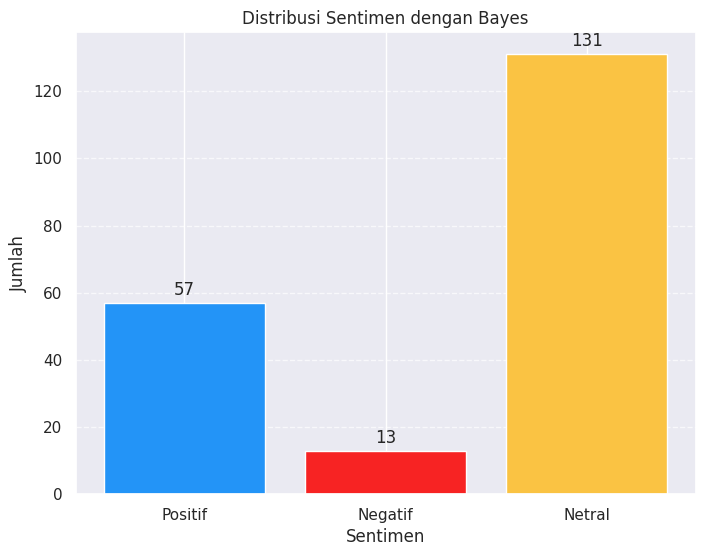

In [100]:
# visualisasi unutk menampilkan jumlah sentimen
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema seaborn
sns.set_theme()

# Label dan jumlah sentimen
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan bar chart
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan anotasi jumlah di atas bar
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Mengatur label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menampilkan bar chart dengan judul
show_bar_chart(labels, counts, "Distribusi Sentimen dengan Bayes")


In [65]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,mudah mudah darah baru energik menang mudah mu...,easy easy new blood energetic win easy easy an...,Positif,Netral
1,anak fufufafa,son of fufufafa,Netral,Netral
2,top lah jangan ragu komitmen pks indonesia ban...,"top, don't hesitate, the commitment of Indones...",Positif,Positif
3,kalau nyarik kerja daerah masing masing jangan...,"if you work in your respective area, don't jum...",Netral,Netral
4,anjing tetap anjing apa wujud status,dog fixed dog what is the status,Positif,Netral
...,...,...,...,...
196,haru prabowo guna surat pakai partai gerinda b...,haru prabowo to use the grinding party letter ...,Positif,Netral
197,program rk realistis banget sesuai butuh masya...,very realistic rk program according to the nee...,Positif,Positif
198,jakarta sekarang simpang mau maju pilih pimpin...,jakarta is now at a crossroads to move forward...,Positif,Positif
199,ulama udah sepakat tokoh masyarakat ikut dukun...,ulama has agreed that community leaders will s...,Netral,Netral


# 7. Klasifikasi Sentimen SVM

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [133]:
# 1. Preprocessing data: Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Konversi teks ke vektor numerik
X = tfidf.fit_transform(data['tweet_english'])

# 2. Target labels ('klasifikasi' = Positif, Negatif, Netral)
y = data['klasifikasi']

# 3. Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Inisialisasi dan latih classifier SVM
svm_classifier = SVC(kernel='linear')  # Gunakan kernel 'linear' untuk SVM
svm_classifier.fit(X_train, y_train)

# 5. Evaluasi hasil
y_pred = svm_classifier.predict(X_test)

# Cetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test SVM: {accuracy * 100:.2f}%")

Akurasi Test SVM: 56.10%


In [134]:
# 6. Lakukan prediksi untuk setiap tweet dalam dataset
data_tweet = list(data['tweet_english'])
status = []
total_positif = total_negatif = total_netral = total = 0

# Ubah data_tweet ke dalam bentuk numerik dengan TF-IDF
X_tweets = tfidf.transform(data_tweet)

# Lakukan prediksi sentimen menggunakan classifier SVM
predicted_sentiments = svm_classifier.predict(X_tweets)

In [135]:
# 7. Hitung total positif, netral, dan negatif berdasarkan prediksi
for sentiment in predicted_sentiments:
    if sentiment == "Positif":
        total_positif += 1
    elif sentiment == "Netral":
        total_netral += 1
    else:
        total_negatif += 1
    total += 1
    status.append(sentiment)

# 8. Cetak hasil analisis
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 77
Netral = 98
Negatif = 26

Total Data: 201


In [136]:
status = pd.DataFrame({"Klasifikasi SVM": status})
data['klasifikasi_svm'] = status

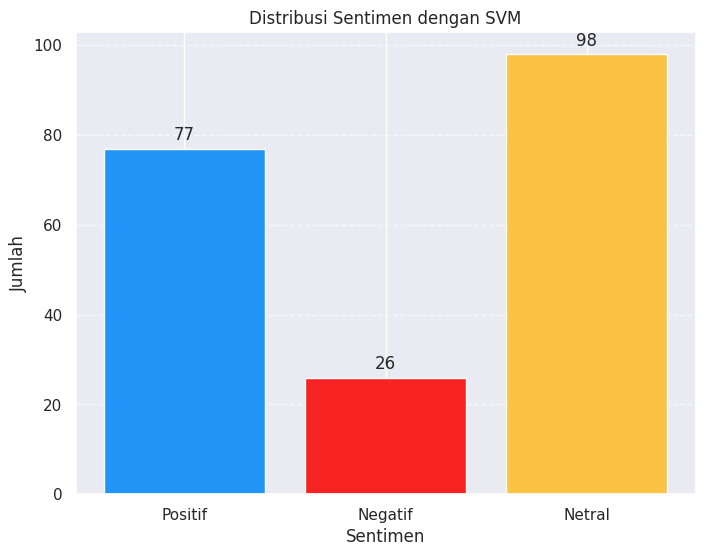

In [138]:
# visualisasi unutk menampilkan jumlah sentimen
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema seaborn
sns.set_theme()

# Label dan jumlah sentimen
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan bar chart
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan anotasi jumlah di atas bar
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Mengatur label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menampilkan bar chart dengan judul
show_bar_chart(labels, counts, "Distribusi Sentimen dengan SVM")


# PERBANDINGAN
1. Naive Bayes

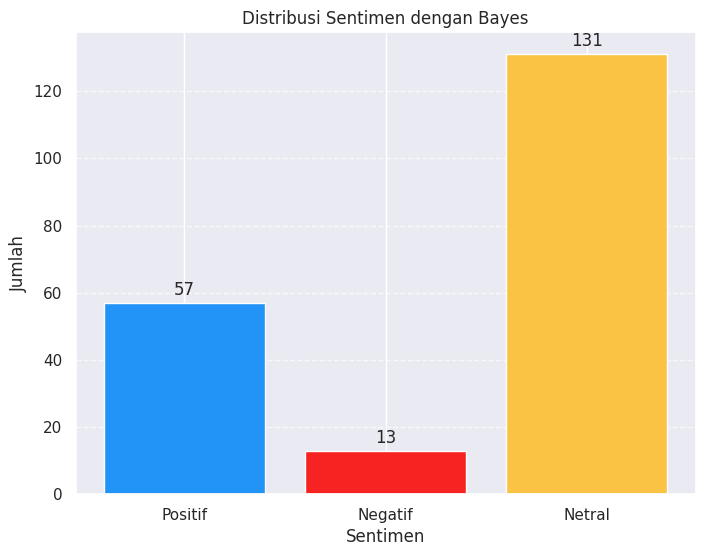

2. SVM

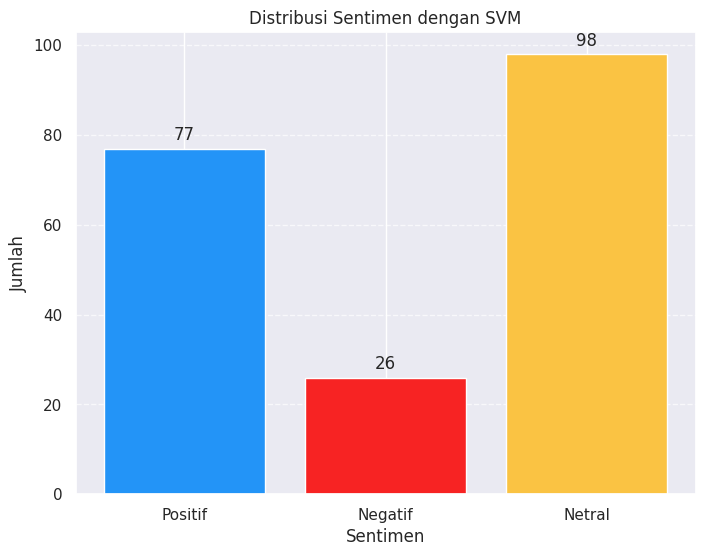

PERBANDIGAN AKURASI:

Naive Bayes : 74.63%

SVM : 56.1%